### Import libraries 

In [241]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
import matplotlib as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from pylab import*

### Load the file/s

In [3]:
path="data/"

In [4]:
!ls -s {path}

total 20
4 lyric_five.txt  4 lyric_one.txt    4 lyric_two.txt
4 lyric_four.txt  4 lyric_three.txt


In [8]:
files = ["lyric_one.txt","lyric_two.txt","lyric_three.txt", "lyric_four.txt","lyric_five.txt"]

texto = " "
for element in files:
    with open(path+element,"r") as f:
        a=f.read()
        texto=texto+a

texto= texto.replace("\n"," ")

In [30]:
t = TextBlob(texto)
t

TextBlob(" Welcome To The Jungle  Welcome to the jungle We've got fun 'n' games We got everything you want Honey, we know the names We are the people that can find Whatever you may need If you got the money, honey, We got your disease  [Chorus:] In the jungle Welcome to the jungle Watch it bring you to your Knees, knees I wanna watch you bleed  Welcome to the jungle We take it day by day If you want it you're gonna bleed But it's the price you pay And you're a very sexy girl That's very hard to please You can taste the bright lights But you won't get them for free  In the jungle Welcome to the jungle Feel my, my, my serpentine I, I wanna hear you scream  Welcome to the jungle It gets worse here everyday Ya learn ta live like an animal In the jungle where we play If you got a hunger for what you see You'll take it eventually You can have anything you want But you better not take it from me  [Chorus:] In the jungle Welcome to the jungle Watch it bring you to your Knees, knees I'm gonna w

### Split the text into words

In [39]:
 print(t.words)

['Welcome', 'To', 'The', 'Jungle', 'Welcome', 'to', 'the', 'jungle', 'We', "'ve", 'got', 'fun', "'n", 'games', 'We', 'got', 'everything', 'you', 'want', 'Honey', 'we', 'know', 'the', 'names', 'We', 'are', 'the', 'people', 'that', 'can', 'find', 'Whatever', 'you', 'may', 'need', 'If', 'you', 'got', 'the', 'money', 'honey', 'We', 'got', 'your', 'disease', 'Chorus', 'In', 'the', 'jungle', 'Welcome', 'to', 'the', 'jungle', 'Watch', 'it', 'bring', 'you', 'to', 'your', 'Knees', 'knees', 'I', 'wan', 'na', 'watch', 'you', 'bleed', 'Welcome', 'to', 'the', 'jungle', 'We', 'take', 'it', 'day', 'by', 'day', 'If', 'you', 'want', 'it', 'you', "'re", 'gon', 'na', 'bleed', 'But', 'it', "'s", 'the', 'price', 'you', 'pay', 'And', 'you', "'re", 'a', 'very', 'sexy', 'girl', 'That', "'s", 'very', 'hard', 'to', 'please', 'You', 'can', 'taste', 'the', 'bright', 'lights', 'But', 'you', 'wo', "n't", 'get', 'them', 'for', 'free', 'In', 'the', 'jungle', 'Welcome', 'to', 'the', 'jungle', 'Feel', 'my', 'my', 'my',

### Clean the text and calculate the frequency

In [67]:
#filtramos por palabras
simbolos=["(",")",",","``","?",".","'","''","'ll","'s","n't",";","[","]",":","!","...","\","]
words=[i for i in t.words if i not in simbolos]

#las ponemos todas minúsculas
lower_words=[str(word).lower() for word in words]

#por último eliminamos aquellas palabras que no aportan valos al texto y son muy genéricas
stop = set(stopwords.words('english'))
good_words=[i for i in lower_words if i not in stop]

#Una vez aquí, calculamos la frecuencia de las palabras
freq ={}
for token in good_words:
    if token in freq:
        freq[token]+=1
    else:
        freq[token]=1

pals_frecuentes=sorted(freq.items(), key=lambda kv: kv[1],reverse=True)
print(pals_frecuentes[:100])

[('jungle', 20), ('cry', 20), ('go', 19), ('heaven', 15), ('tonight', 13), ('mine', 13), ('door', 12), ('sweet', 12), ('welcome', 11), ('time', 11), ('know', 10), ('need', 9), ('knock-knock-knockin', 9), ('child', 9), ('got', 8), ('knees', 8), ('baby', 8), ('love', 8), ('watch', 7), ('take', 7), ("'re", 7), ('bring', 6), ('na', 6), ('rain', 6), ('want', 5), ('please', 5), ('feel', 5), ('see', 5), ("'ve", 4), ('gon', 4), ('hard', 4), ('cold', 4), ('could', 4), ('eyes', 4), ('still', 4), ('november', 4), ('one', 4), ('alone', 4), ('honey', 3), ('bleed', 3), ('ya', 3), ('like', 3), ('better', 3), ("'m", 3), ('never', 3), ('ever', 3), ('come', 3), ("'cause", 3), ('forever', 3), ('inside', 3), ('give', 3), ('long', 3), ("'d", 3), ('everybody', 3), ('everything', 2), ('find', 2), ('chorus', 2), ('wan', 2), ('day', 2), ('bright', 2), ('get', 2), ('serpentine', 2), ('ta', 2), ('mama', 2), ('ca', 2), ('anymore', 2), ('dark', 2), ('feels', 2), ('knockin', 2), ('would', 2), ('something', 2), ('he

### Classification by word category

In [68]:
adjetivos=[]
nombres=[]
verbos=[]
for palabra in nltk.pos_tag(set(good_words)):
    if palabra[1]=='JJ':
        adjetivos.append(palabra[0])
    if palabra [1]=='NN':
        nombres.append(palabra[0])
    if palabra [1]=='VB':
        verbos.append(palabra[0])

print(adjetivos[:50])
print('-'*70) #guiones para separar los textos
print(nombres[:50])
print('-'*70) #guiones para separar los textos
print(verbos[:50])


['mortician', 'sky', 'black', 'die', 'walkin', 'hair', 'blue', 'hang', 'long', 'na', 'animal', 'knock-knock-knockin', 'ne', 'sexy', 'cloud', 'alive', 'watch', 'someday', 'warm', 'libido', 'high', 'jungle', 'fresh', 'alright', 'serpentine', 'november', 'shoot', 'darlin', 'sure', 'subjugation', 'open', 'everyday', 'ha', 'left', 'felt', 'light', 'special', 'cold', 'live', 'pray', 'dark', 'broken', 'free', 'shadows', 'refrain', 'bad', 'safe', 'sigh', 'heaven', 'hear']
----------------------------------------------------------------------
['whisper', 'subside', 'door', 'bright', 'something', 'girl', 'harm', 'life', 'lettin', 'time', 'heart', 'kiss', 'everything', 'comin', 'mine', 'make', 'sugar', 'give', 'ta', 'man', 'darkness', 'charm', 'pass', 'rank', 'someone', 'bank', 'ya', 'tonight', 'think', 'pain', 'chorus', 'ground', 'jack', 'forever', 'sorrow', 'place', 'somebody', 'bring', 'get', 'change', 'talk', 'price', 'love', 'worse', 'look', 'hide', 'tryin', 'honey', 'want', 'anymore']
-----

### Visualization

First of all, a single DataFrame will be built merging two dataframes:
1. word and frequency 
2. word and tag

Both dataframes were created gathering the data obtained from the previous analysis of five Guns n' Roses songs .

In [240]:
pf=pd.DataFrame(pals_frecuentes,columns=['word','frequency'])
print(pf[:10])

      word  frequency
0   jungle         20
1      cry         20
2       go         19
3   heaven         15
4  tonight         13
5     mine         13
6     door         12
7    sweet         12
8  welcome         11
9     time         11


In [96]:
tag=pd.DataFrame(nltk.pos_tag(set(pf.word)),columns=['word','tag'])
print(tag[:10])

        word  tag
0    thought  VBN
1     hearts  NNS
2       eyes  NNS
3       like   IN
4  mortician   JJ
5    whisper   NN
6    subside   NN
7       door   NN
8     nothin   IN
9      never   RB


### Join both dataFrames into only one

In [207]:
tabla=pf.merge(tag,how='left')
tabla

,word,frequency,tag
0,jungle,20,NN
1,cry,20,NN
2,go,19,VBP
3,heaven,15,JJ
4,tonight,13,VBD
5,mine,13,NN
6,door,12,NN
7,sweet,12,NN
8,welcome,11,VBP
9,time,11,NN


### Top ten words by frequency 

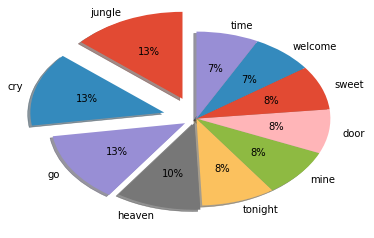

In [236]:
fig1,ax1=plt.subplots()
explode=(0.25,0.25,0.1,0.05,0,0,0,0,0,0) #highlight the 4 main values
sizes=tabla[:10].frequency
labels=tabla[:10].word


ax1.pie(sizes,labels=labels,autopct='%1d%%',explode=explode,shadow=True, startangle=90)
ax1.axis=('equal') #Equal aspect ratio ensures that pie is drawn as a circle



### Which tags have the most frequency?

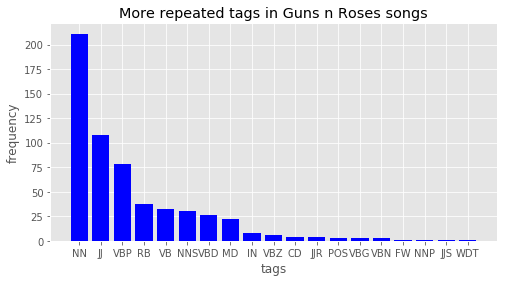

In [239]:
tag_freq=tabla.groupby('tag').sum().sort_values(by='frequency',ascending=False).reset_index()
plt.figure(figsize=(8,4))
plt.bar(tag_freq['tag'],tag_freq.frequency,color='blue')
plt.xlabel('tags')
plt.ylabel('frequency')
plt.title('Most repeated tags in Guns n Roses songs')
plt.show()